## Using Crow-AMSAA Method to Forecast Failures by Calendar Month

Function for cumulative number of failures:

$n(t)=\lambda t^\beta$

To convert this equation above into a linear form, we simply apply the log on both sides of the equation:

$\underbrace{\log n(t)}=\underbrace{\beta} \underbrace{\log t} + \underbrace{\log \lambda}$

$\space\space\space\space\space y \space\space\space\space\space = \space\space m \space \cdot \space\space x \space\space + \space\space b$

In [1]:
from numpy import log as ln
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.options.display.max_rows=1000

#### Input Data

Data needed for Crow-AMSAA is just a table where one column is days or miles sorted and another column containing cumulative failures

In [2]:
df = pd.read_clipboard()

In [3]:
df.head()

,DAYS_TO_FAIL,CUMULATIVE_FAILURES
0,126,1
1,162,2
2,233,3
3,263,4
4,336,5


In [4]:
df.tail()

,DAYS_TO_FAIL,CUMULATIVE_FAILURES
132,1805,133
133,1816,134
134,1853,135
135,1863,136
136,1895,137


#### Plot Days/Miles on X axis and Cumulative Failures on Y axis on Log Scale

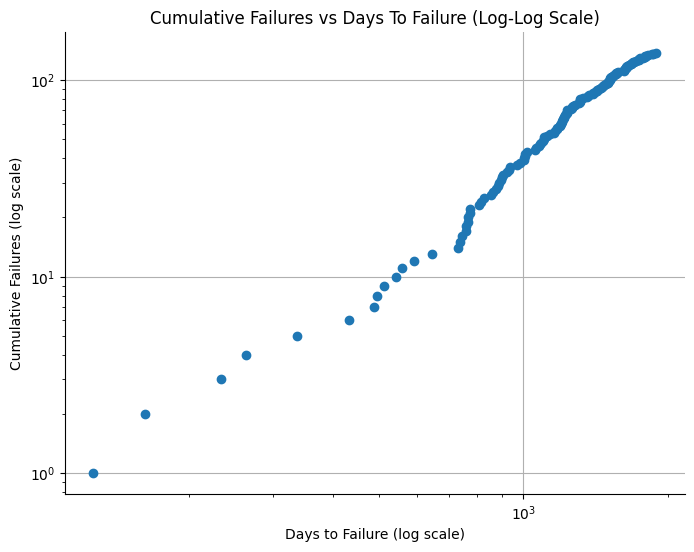

In [5]:
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.plot(df['DAYS_TO_FAIL'], df['CUMULATIVE_FAILURES'], marker='o', linestyle='')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale
plt.title('Cumulative Failures vs Days To Failure (Log-Log Scale)')
# Alternatively, we can do plt.loglog(), but the above is more explicit, which I prefer
# plt.loglog(df['Cumulative Time In Days'], df['Failure Number'], marker='o', linestyle='')cale)')
plt.xlabel('Days to Failure (log scale)')
plt.ylabel('Cumulative Failures (log scale)')
plt.grid(True)
plt.show()

#### Apply Linear Regression / Best Fit Line

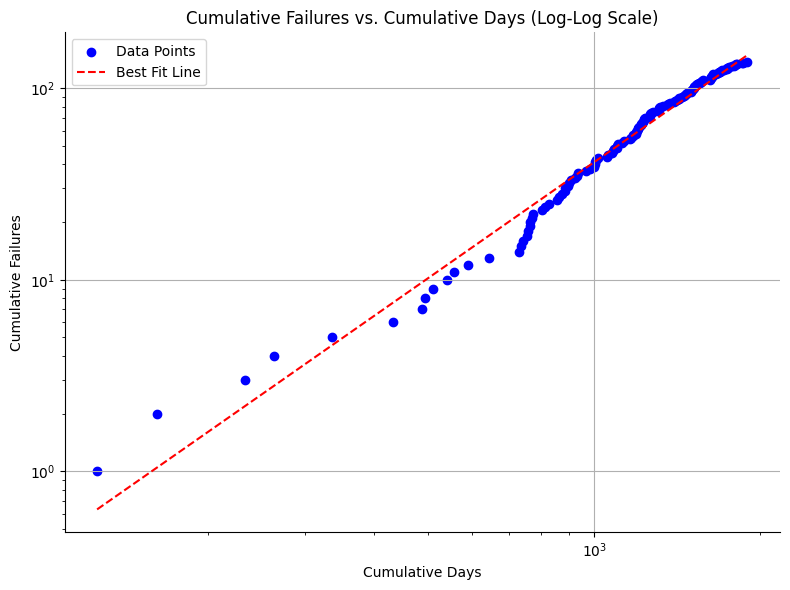

Fitted Line Equation: y = 0.00 * x^2.01
Slope: 2.0146
Intercept: 0.0000
R-squared: 0.9796


In [6]:
# Extract the data
cumulative_days = df['DAYS_TO_FAIL']
cumulative_failures = df['CUMULATIVE_FAILURES']

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(ln(cumulative_days), ln(cumulative_failures))

# Create a log-log scatter plot
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.scatter(cumulative_days, cumulative_failures, marker='o', color='b', label='Data Points')
plt.xscale('log')  # Set x-axis to log scale
plt.yscale('log')  # Set y-axis to log scale

# Plot the best-fit line
x_fit = np.linspace(min(cumulative_days), max(cumulative_days))
y_fit = np.exp(intercept) * (x_fit**slope)
plt.plot(x_fit, y_fit, color='r', linestyle='--', label='Best Fit Line')

plt.title('Cumulative Failures vs. Days to Failure (Log-Log Scale)')
plt.xlabel('Cumulative Days')
plt.ylabel('Cumulative Failures')
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

# Print the fitted line equation, slope and intercept of the best-fit line
print(f"Fitted Line Equation: y = {np.exp(intercept):.2f} * x^{slope:.2f}")
print(f"Slope: {slope:.4f}")
print(f"Intercept: {np.exp(intercept):.4f}")
print(f"R-squared: {r_value**2:.4f}")

#### Forecast Using Estimated $\lambda$ and $\beta$ Crow-AMSAA Parameters

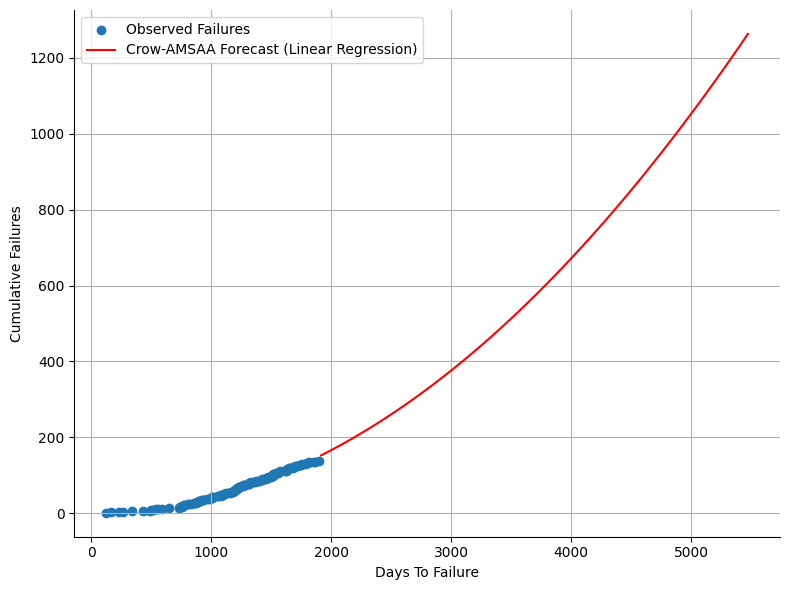

Lambda Estimate: 3.7146574135032254e-05
Beta Estimate: 2.014644219431237


In [7]:
# Extract estimated parameters
lambda_estimate = np.exp(intercept)
beta_estimate = slope

# Forecast future failures using the model
forecast_time = np.arange(1916.25, 5505, 30.416667)  # Requestors want forecast after 15 years or 5475 days
forecast_log_failures = intercept + slope * ln(forecast_time)
forecast_failures = np.exp(forecast_log_failures)

# Plot the original data and the fitted model
fig, ax = plt.subplots(figsize=(8,6))
ax.spines[['right', 'top']].set_visible(False)

plt.scatter(df['DAYS_TO_FAIL'], df['CUMULATIVE_FAILURES'], label='Observed Failures')
plt.plot(forecast_time, forecast_failures, label='Crow-AMSAA Forecast (Linear Regression)', color='red')
plt.xlabel('Days To Failure')
plt.ylabel('Cumulative Failures')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Display the estimated parameters
print("Lambda Estimate:", lambda_estimate)
print("Beta Estimate:", beta_estimate)

#### Creating pandas dataframe containing our forecast data

In [8]:
forecast_time

array([1916.25    , 1946.666667, 1977.083334, 2007.500001, 2037.916668,
       2068.333335, 2098.750002, 2129.166669, 2159.583336, 2190.000003,
       2220.41667 , 2250.833337, 2281.250004, 2311.666671, 2342.083338,
       2372.500005, 2402.916672, 2433.333339, 2463.750006, 2494.166673,
       2524.58334 , 2555.000007, 2585.416674, 2615.833341, 2646.250008,
       2676.666675, 2707.083342, 2737.500009, 2767.916676, 2798.333343,
       2828.75001 , 2859.166677, 2889.583344, 2920.000011, 2950.416678,
       2980.833345, 3011.250012, 3041.666679, 3072.083346, 3102.500013,
       3132.91668 , 3163.333347, 3193.750014, 3224.166681, 3254.583348,
       3285.000015, 3315.416682, 3345.833349, 3376.250016, 3406.666683,
       3437.08335 , 3467.500017, 3497.916684, 3528.333351, 3558.750018,
       3589.166685, 3619.583352, 3650.000019, 3680.416686, 3710.833353,
       3741.25002 , 3771.666687, 3802.083354, 3832.500021, 3862.916688,
       3893.333355, 3923.750022, 3954.166689, 3984.583356, 4015.

In [9]:
forecast_failures

array([ 152.36739846,  157.27911606,  162.26932524,  167.33804385,
        172.48528942,  177.71107927,  183.01543042,  188.39835969,
        193.85988362,  199.40001855,  205.01878058,  210.71618559,
        216.49224926,  222.34698704,  228.28041421,  234.29254583,
        240.38339676,  246.5529817 ,  252.80131516,  259.12841145,
        265.53428474,  272.01894901,  278.58241807,  285.2247056 ,
        291.94582508,  298.74578987,  305.62461317,  312.58230802,
        319.61888733,  326.73436387,  333.92875027,  341.20205901,
        348.55430247,  355.98549287,  363.49564233,  371.08476282,
        378.75286622,  386.49996425,  394.32606856,  402.23119064,
        410.21534192,  418.27853367,  426.42077708,  434.64208324,
        442.9424631 ,  451.32192756,  459.78048739,  468.31815325,
        476.93493574,  485.63084533,  494.40589243,  503.26008732,
        512.19344024,  521.20596129,  530.29766052,  539.46854789,
        548.71863326,  558.04792641,  567.45643707,  576.94417

In [10]:
df_forecast = pd.DataFrame(
    {
        'Days': forecast_time,
        'Cumulative Failures': forecast_failures
    }
)

In [11]:
df_forecast

,Days,Cumulative Failures
0,1916.250000,152.367398
1,1946.666667,157.279116
2,1977.083334,162.269325
3,2007.500001,167.338044
4,2037.916668,172.485289
5,2068.333335,177.711079
6,2098.750002,183.015430
7,2129.166669,188.398360
8,2159.583336,193.859884
9,2190.000003,199.400019


#### To obtain the forecast at any time $t$, use the log transformed version of the Crow-AMSAA equation:

$n(t)=\lambda t^\beta$

$\log n(t)=\log \lambda+\beta \log t$

For instance, if we want to know the cumulative failures after 5,475 days (15 years):

In [12]:
np.exp(ln(lambda_estimate)+(beta_estimate * ln(5475)))

1263.0854470095287

## Using MLE to estimate Crow-AMSAA Parameters

Instead of using linear regression to estimate C-A parameters, we can opt to use MLE (maximum likelihood estimation) to estimate C-A parameters.

See this Reliasoft [article](https://www.hbkworld.com/en/knowledge/resource-center/articles/the-change-of-slope-methodology-in-reliability-growth-analysis) for the MLE equations.